# RTMA and URMA

This tutorial shows you how to download the Real-Time Mesoscale Analysis (RTMA) and Un-Restricted Mesoscale Analysis (URMA) products with the Herbie Python package.

- For RTMA, use `model='rtma'`
- For RTMA Rapid Update, use `model='rtma_ru'`
- For RTMA Alaska, use `model='rtma_ak'`
- For URMA, use `model='urma'`
- For URMA Alaska, use `model='urma_ak'`


In [ ]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc

from herbie import paint

import matplotlib.pyplot as plt

In [9]:
H = Herbie(
    "2024-01-01 06:00",
    model="rtma",
    product="anl",
)

✅ Found ┊ model=rtma ┊ product=anl ┊ 2024-Jan-01 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [10]:
# Show available products
H.PRODUCTS

{'anl': 'Analysis',
 'err': 'Analysis Forecast Error',
 'ges': 'Forecasts',
 'pcp': 'Precipitation Field'}

In [11]:
H.SOURCES

{'aws': 'https://noaa-rtma-pds.s3.amazonaws.com/rtma2p5.20240101/rtma2p5.t06z.2dvaranl_ndfd.grb2_wexp',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/rtma/prod/rtma2p5.20240101/rtma2p5.t06z.2dvaranl_ndfd.grb2_wexp'}

Since there is no index file, we need to download the full file before we can look at the contents with wgrib2.


In [12]:
H.download(verbose=True)  # verbose will show you download progress

👨🏻‍🏭 Created directory: [/home/blaylock/data/rtma/20240101]
✅ Success! Downloaded RTMA from aws                 
	src: https://noaa-rtma-pds.s3.amazonaws.com/rtma2p5.20240101/rtma2p5.t06z.2dvaranl_ndfd.grb2_wexp
	dst: /home/blaylock/data/rtma/20240101/rtma2p5.t06z.2dvaranl_ndfd.grb2_wexp


PosixPath('/home/blaylock/data/rtma/20240101/rtma2p5.t06z.2dvaranl_ndfd.grb2_wexp')

In [13]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,7490117.0,0-7490117,2024-01-01 06:00:00,2024-01-01 06:00:00,HGT,surface,anl,:HGT:surface:anl
1,2,7490118,14980235.0,7490118-14980235,2024-01-01 06:00:00,2024-01-01 06:00:00,PRES,surface,anl,:PRES:surface:anl
2,3,14980236,21065992.0,14980236-21065992,2024-01-01 06:00:00,2024-01-01 06:00:00,TMP,2 m above ground,anl,:TMP:2 m above ground:anl
3,4,21065993,27619869.0,21065993-27619869,2024-01-01 06:00:00,2024-01-01 06:00:00,DPT,2 m above ground,anl,:DPT:2 m above ground:anl
4,5,27619870,33237505.0,27619870-33237505,2024-01-01 06:00:00,2024-01-01 06:00:00,UGRD,10 m above ground,anl,:UGRD:10 m above ground:anl
5,6,33237506,38855141.0,33237506-38855141,2024-01-01 06:00:00,2024-01-01 06:00:00,VGRD,10 m above ground,anl,:VGRD:10 m above ground:anl
6,7,38855142,45877139.0,38855142-45877139,2024-01-01 06:00:00,2024-01-01 06:00:00,SPFH,2 m above ground,anl,:SPFH:2 m above ground:anl
7,8,45877140,51494775.0,45877140-51494775,2024-01-01 06:00:00,2024-01-01 06:00:00,WDIR,10 m above ground,anl,:WDIR:10 m above ground:anl
8,9,51494776,56644290.0,51494776-56644290,2024-01-01 06:00:00,2024-01-01 06:00:00,WIND,10 m above ground,anl,:WIND:10 m above ground:anl
9,10,56644291,62261926.0,56644291-62261926,2024-01-01 06:00:00,2024-01-01 06:00:00,GUST,10 m above ground,anl,:GUST:10 m above ground:anl


In [14]:
ds = H.xarray("TMP:2 m")
ds

<xarray.Dataset> Size: 75MB
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 8B 2024-01-01T06:00:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 30MB 19.23 19.23 19.24 ... 54.38 54.37
    longitude            (y, x) float64 30MB 233.7 233.7 233.8 ... 300.9 301.0
    valid_time           datetime64[ns] 8B 2024-01-01T06:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 15MB 294.8 294.8 294.8 ... 257.1 257.1
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma
    product:                 anl
    description:             CONUS Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /home/blaylock/data/rtma/20240101/rtma2p5.t06z.2...
    local_grib:              /home/blaylock/data/rtma/20240101/subset_33efba7...
    search:                  TMP:2 m

Text(1.0, 1.0, '2 metre temperature')

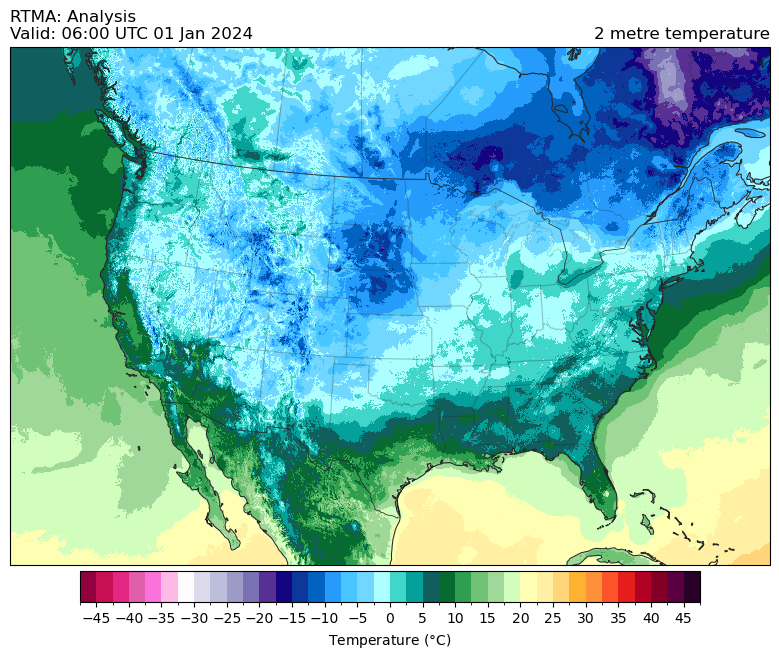

In [15]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).BORDERS().STATES().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **paint.NWSTemperature.cbar_kwargs2,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")

## RTMA Precipitation

The precipitation data is found in a different file, but Herbie will locate it when you `produce='pcp'`.

I believe this field represents the 1-hr accumulated precipitation from the analysis time to analysis+1hr.


In [18]:
H = Herbie(
    "2024-06-01 06:00",
    model="rtma",
    product="pcp",
)
H.inventory()

✅ Found ┊ model=rtma ┊ product=pcp ┊ 2024-Jun-01 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,0-,2024-06-01 05:00:00,2024-06-01 05:00:00,APCP,0 m above mean sea level,0-1 hour acc fcst,:APCP:0 m above mean sea level:0-1 hour acc fcst


In [21]:
ds = H.xarray()
ds["tp"] = ds.tp.where(ds.tp > 0)
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset> Size: 59MB
Dimensions:              (y: 1377, x: 2145)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-01T05:00:00
    step                 timedelta64[ns] 8B 01:00:00
    heightAboveSea       float64 8B 0.0
    latitude             (y, x) float64 24MB ...
    longitude            (y, x) float64 24MB ...
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    tp                   (y, x) float32 12MB nan nan nan nan ... nan nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma
    product:                 pcp
    description:             CONUS Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /home/blaylock/data/rtma/20240601/rtma2p5.202406...
    local_grib:              /home/blaylock/data/rtma/20240601/rtma2p5.202406...
    search:                  None

Text(1.0, 1.0, 'Total Precipitation')

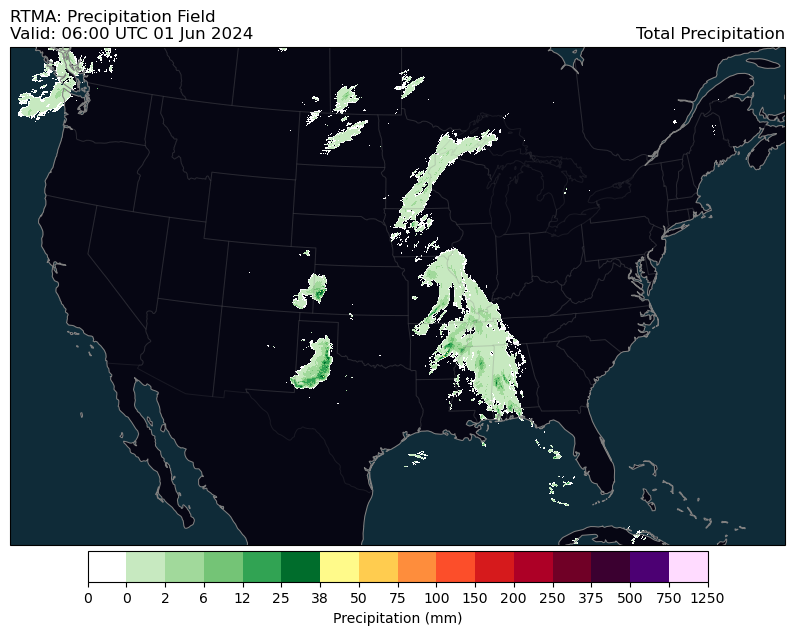

In [22]:
ax = (
    EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8], theme="dark").STATES().OCEAN().ax
)

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.tp,
    transform=pc,
    **paint.NWSPrecipitation.kwargs2,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **paint.NWSPrecipitation.cbar_kwargs2,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.tp.GRIB_name, loc="right")

## RTMA Alaska


In [ ]:
H = Herbie(
    "2024-01-01 06:00",
    model="rtma_ak",
    product="anl",
)

✅ Found ┊ model=rtma_ak ┊ product=anl ┊ 2024-Jan-01 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [ ]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,3644461.0,0-3644461,2024-01-01 06:00:00,2024-01-01 06:00:00,HGT,surface,anl,:HGT:surface:anl
1,2,3644462,7288923.0,3644462-7288923,2024-01-01 06:00:00,2024-01-01 06:00:00,PRES,surface,anl,:PRES:surface:anl
2,3,7288924,10250081.0,7288924-10250081,2024-01-01 06:00:00,2024-01-01 06:00:00,TMP,2 m above ground,anl,:TMP:2 m above ground:anl
3,4,10250082,13211239.0,10250082-13211239,2024-01-01 06:00:00,2024-01-01 06:00:00,DPT,2 m above ground,anl,:DPT:2 m above ground:anl
4,5,13211240,16172397.0,13211240-16172397,2024-01-01 06:00:00,2024-01-01 06:00:00,UGRD,10 m above ground,anl,:UGRD:10 m above ground:anl
5,6,16172398,19133555.0,16172398-19133555,2024-01-01 06:00:00,2024-01-01 06:00:00,VGRD,10 m above ground,anl,:VGRD:10 m above ground:anl
6,7,19133556,22094713.0,19133556-22094713,2024-01-01 06:00:00,2024-01-01 06:00:00,SPFH,2 m above ground,anl,:SPFH:2 m above ground:anl
7,8,22094714,24828103.0,22094714-24828103,2024-01-01 06:00:00,2024-01-01 06:00:00,WDIR,10 m above ground,anl,:WDIR:10 m above ground:anl
8,9,24828104,27561493.0,24828104-27561493,2024-01-01 06:00:00,2024-01-01 06:00:00,WIND,10 m above ground,anl,:WIND:10 m above ground:anl
9,10,27561494,30294883.0,27561494-30294883,2024-01-01 06:00:00,2024-01-01 06:00:00,GUST,10 m above ground,anl,:GUST:10 m above ground:anl


In [ ]:
ds = H.xarray("WIND:10 m")
ds

<xarray.Dataset> Size: 36MB
Dimensions:              (y: 1105, x: 1649)
Coordinates:
    time                 datetime64[ns] 8B 2024-01-01T06:00:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 10.0
    latitude             (y, x) float64 15MB 40.53 40.54 40.55 ... 64.0 63.98
    longitude            (y, x) float64 15MB 181.4 181.5 181.5 ... 266.3 266.3
    valid_time           datetime64[ns] 8B 2024-01-01T06:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    si10                 (y, x) float32 7MB 3.4 3.49 3.49 ... 2.93 2.92 2.92
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma_ak
    product:                 anl
    description:             Alaska Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             https://noaa-rtma-pds.s3.amazonaws.com/akrtma.20...
    local_grib:              /home/blaylock/data/rtma_ak/20240101/subset_33ef...
    search:                  WIND:10 m

Text(1.0, 1.0, '10 metre wind speed')

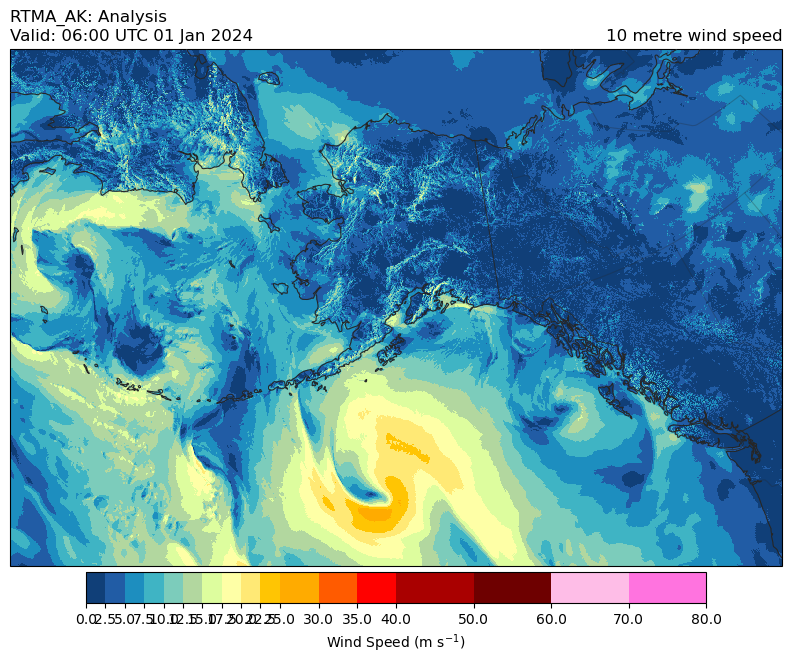

In [5]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().BORDERS().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.si10,
    transform=pc,
    **paint.NWSWindSpeed.kwargs2,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **paint.NWSWindSpeed.cbar_kwargs2,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.si10.GRIB_name, loc="right")

## RTMA Rapid Update

The rapid update files are produced every 15 minutes for two products, the initial best guess (`ges`) and the analyzed grid (`anl`).

In [2]:
H = Herbie(
    "2024-01-01 06:15",
    model="rtma_ru",
    product="anl",
)

✅ Found ┊ model=rtma_ru ┊ product=anl ┊ 2024-Jan-01 06:15 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local


In [3]:
# The same variable names are used in RTMA-RU as in RTMA-AK
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,7490117.0,0-7490117,2024-01-01 06:00:00,2024-01-01 06:00:00,HGT,surface,anl,:HGT:surface:anl
1,2,7490118,14980235.0,7490118-14980235,2024-01-01 06:00:00,2024-01-01 06:00:00,PRES,surface,anl,:PRES:surface:anl
2,3,14980236,21065992.0,14980236-21065992,2024-01-01 06:00:00,2024-01-01 06:00:00,TMP,2 m above ground,anl,:TMP:2 m above ground:anl
3,4,21065993,27619869.0,21065993-27619869,2024-01-01 06:00:00,2024-01-01 06:00:00,DPT,2 m above ground,anl,:DPT:2 m above ground:anl
4,5,27619870,33237505.0,27619870-33237505,2024-01-01 06:00:00,2024-01-01 06:00:00,UGRD,10 m above ground,anl,:UGRD:10 m above ground:anl
5,6,33237506,38855141.0,33237506-38855141,2024-01-01 06:00:00,2024-01-01 06:00:00,VGRD,10 m above ground,anl,:VGRD:10 m above ground:anl
6,7,38855142,45877139.0,38855142-45877139,2024-01-01 06:00:00,2024-01-01 06:00:00,SPFH,2 m above ground,anl,:SPFH:2 m above ground:anl
7,8,45877140,51494775.0,45877140-51494775,2024-01-01 06:00:00,2024-01-01 06:00:00,WDIR,10 m above ground,anl,:WDIR:10 m above ground:anl
8,9,51494776,56644290.0,51494776-56644290,2024-01-01 06:00:00,2024-01-01 06:00:00,WIND,10 m above ground,anl,:WIND:10 m above ground:anl
9,10,56644291,62261926.0,56644291-62261926,2024-01-01 06:00:00,2024-01-01 06:00:00,GUST,10 m above ground,anl,:GUST:10 m above ground:anl


In [5]:
ds = H.xarray("WIND:10 m")
print(ds)

<xarray.Dataset> Size: 75MB
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 8B 2024-01-01T06:15:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 10.0
    latitude             (y, x) float64 30MB ...
    longitude            (y, x) float64 30MB ...
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    si10                 (y, x) float32 15MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma_ru
    product:                 anl
    description:             CONUS Rapid Update Real-Time Mesoscale Analysis ...
    remote_grib:             https://noaa-rtma-p

c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\herbie\core.py:1208: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


The latest data can be found using [HerbieLatest](https://herbie.readthedocs.io/en/stable/user_guide/tutorial/latest.html), specifing `rtma_ru` as the model.

In [6]:
from herbie import HerbieLatest

latest_run = HerbieLatest(
            model="rtma_ru",
            periods=5,
            product="anl",
            verbose=True,
            priority="nomads")

💔 Did not find ┊ model=rtma_ru ┊ product=anl ┊ 2025-Oct-03 14:30 UTC F00
✅ Found ┊ model=rtma_ru ┊ product=anl ┊ 2025-Oct-03 14:15 UTC F00 ┊ GRIB2 @ nomads ┊ IDX @ nomads


## RTMA vs URMA

For fun, let's compare the differences between the RTMA and the URMA analyses and see where the differences are for a particular time.

In [2]:
# Just open the entire GRIB2 files (opened in multiple DataSets)
rtma = Herbie("2024-06-11 00:00", model="rtma").xarray(verbose=True)
urma = Herbie("2024-06-11 00:00", model="urma").xarray(verbose=True)

✅ Found ┊ model=rtma ┊ product=anl ┊ 2024-Jun-11 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws


/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=urma ┊ product=anl ┊ 2024-Jun-11 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws


/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


Note: Returning a list of [6] xarray.Datasets because cfgrib opened with multiple hypercubes.


In [7]:
rtma[3]

<xarray.Dataset> Size: 105MB
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-11
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 30MB 19.23 19.23 19.24 ... 54.38 54.37
    longitude            (y, x) float64 30MB 233.7 233.7 233.8 ... 300.9 301.0
    valid_time           datetime64[ns] 8B 2024-06-11
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 15MB ...
    d2m                  (y, x) float32 15MB ...
    sh2                  (y, x) float32 15MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma
    product:                 anl
    description:             CONUS Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /home/blaylock/data/rtma/20240611/rtma2p5.t00z.2...
    local_grib:              /home/blaylock/data/rtma/20240611/rtma2p5.t00z.2...
    search:                  None

In [8]:
urma[3]

<xarray.Dataset> Size: 105MB
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-11
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 30MB 19.23 19.23 19.24 ... 54.38 54.37
    longitude            (y, x) float64 30MB 233.7 233.7 233.8 ... 300.9 301.0
    valid_time           datetime64[ns] 8B 2024-06-11
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 15MB ...
    d2m                  (y, x) float32 15MB ...
    sh2                  (y, x) float32 15MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   urma
    product:                 anl
    description:             CONUS Un-Restricted Mesoscale Analysis (URMA)
    remote_grib:             /home/blaylock/data/urma/20240611/urma2p5.t00z.2...
    local_grib:              /home/blaylock/data/urma/20240611/urma2p5.t00z.2...
    search:                  None

Just to confirm, both the RTMA and URMA have the same grid size and map projection.

In [9]:
print("RTMA:", rtma[3].herbie.crs)
print("URMA:", urma[3].herbie.crs)

RTMA: +proj=lcc +ellps=sphere +a=6371200.0 +b=6371200.0 +lon_0=265.0 +lat_0=25.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +lat_2=25.0 +no_defs +type=crs
URMA: +proj=lcc +ellps=sphere +a=6371200.0 +b=6371200.0 +lon_0=265.0 +lat_0=25.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +lat_2=25.0 +no_defs +type=crs


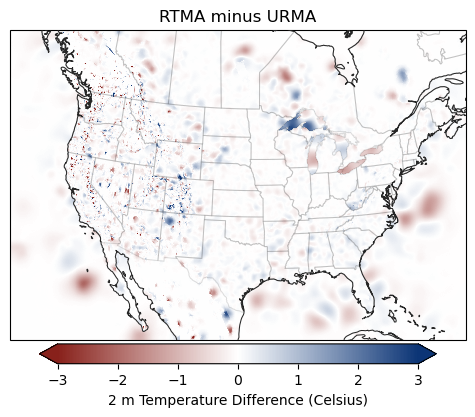

In [3]:
crs = rtma[3].herbie.crs

ax = EasyMap("50m", crs=crs).STATES().ax

art = ax.pcolormesh(
    rtma[3].longitude,
    rtma[3].latitude,
    (rtma[3].t2m - urma[3].t2m),
    transform=pc,
    cmap="herbie.white",  # this is a Custom herbie colormap :)
    vmax=3,
    vmin=-3,
)

ax.set_title("RTMA minus URMA")

art = plt.colorbar(
    art,
    ax=ax,
    label="2 m Temperature Difference (Celsius)",
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    extend="both",
)

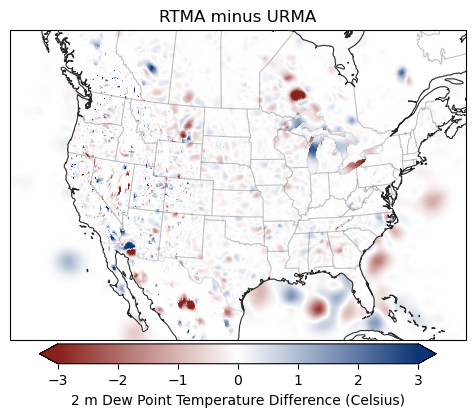

In [4]:
crs = rtma[3].herbie.crs

ax = EasyMap("50m", crs=crs).STATES().ax

art = ax.pcolormesh(
    rtma[3].longitude,
    rtma[3].latitude,
    (rtma[3].d2m - urma[3].d2m),
    transform=pc,
    cmap="herbie.white",
    vmax=3,
    vmin=-3,
)

ax.set_title("RTMA minus URMA")

art = plt.colorbar(
    art,
    ax=ax,
    label="2 m Dew Point Temperature Difference (Celsius)",
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    extend="both",
)

In [5]:
crs = rtma[3].herbie.crs

ax = EasyMap("50m", crs=crs).STATES().ax

art = ax.pcolormesh(
    rtma[2].longitude,
    rtma[2].latitude,
    (rtma[2].si10 - urma[2].si10),
    transform=pc,
    cmap="herbie.white",
    vmax=3,
    vmin=-3,
)

ax.set_title("RTMA minus URMA")

art = plt.colorbar(
    art,
    ax=ax,
    label="10 m Wind Speed Difference (m/s)",
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    extend="both",
)

: 